In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=[32, 32, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
training_data_dir = '/tmp/cats-and-dogs/training_set/training_set/'
test_data_dir = '/tmp/cats-and-dogs/test_set/test_set/'

datagen = ImageDataGenerator(rescale=1./255)
training_set = datagen.flow_from_directory(
    directory=training_data_dir, 
    target_size=(32, 32), 
    classes=['dogs', 'cats'], 
    class_mode='binary',
    batch_size=20
)
test_set = datagen.flow_from_directory(
    directory=test_data_dir, 
    target_size=(32, 32), 
    classes=['dogs', 'cats'], 
    class_mode='binary',
    batch_size=20
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
history = model.fit(training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)

Epoch 1/20
401/401 [==============================] - 65s 149ms/step - loss: 0.6545 - accuracy: 0.6066 - val_loss: 0.5758 - val_accuracy: 0.7118
Epoch 2/20
401/401 [==============================] - 16s 41ms/step - loss: 0.5823 - accuracy: 0.6927 - val_loss: 0.5599 - val_accuracy: 0.7266
Epoch 3/20
401/401 [==============================] - 17s 41ms/step - loss: 0.5445 - accuracy: 0.7229 - val_loss: 0.5384 - val_accuracy: 0.7291
Epoch 4/20
401/401 [==============================] - 16s 41ms/step - loss: 0.5102 - accuracy: 0.7494 - val_loss: 0.5215 - val_accuracy: 0.7459
Epoch 5/20
401/401 [==============================] - 17s 41ms/step - loss: 0.4809 - accuracy: 0.7700 - val_loss: 0.5098 - val_accuracy: 0.7563
Epoch 6/20
401/401 [==============================] - 17s 42ms/step - loss: 0.4577 - accuracy: 0.7874 - val_loss: 0.5034 - val_accuracy: 0.7578
Epoch 7/20
401/401 [==============================] - 17s 42ms/step - loss: 0.4280 - accuracy: 0.7989 - val_loss: 0.5606 - val_accuracy

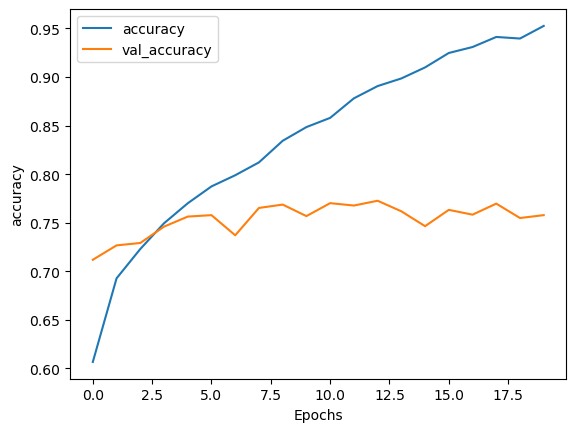

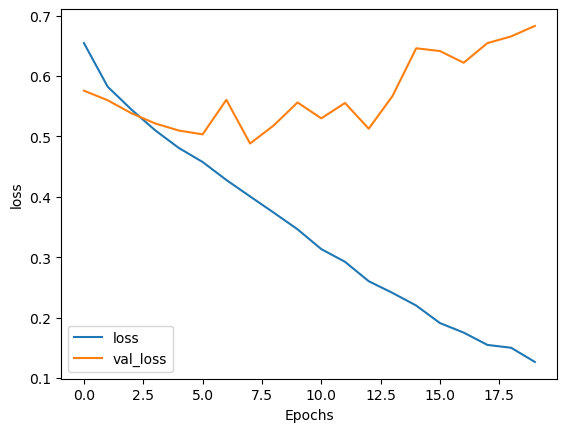

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")